In [1]:
import os
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [2]:
ROOT_PATH = os.path.join(os.getenv('HOME'), 'aiffel')
imate_path = ROOT_PATH + '/ocr_python/sample/*.png'
test_filenames = tf.io.gfile.glob(imate_path)
test_filenames

['/aiffel/aiffel/ocr_python/sample/p2.png',
 '/aiffel/aiffel/ocr_python/sample/p1.png',
 '/aiffel/aiffel/ocr_python/sample/p3.png',
 '/aiffel/aiffel/ocr_python/sample/p4.png']

In [3]:
image_titles = []
images = []
for filename in test_filenames:
    image = cv2.imread(filename)
    images.append(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    image_titles.append(os.path.splitext(os.path.basename(filename))[0])
image_titles

['p2', 'p1', 'p3', 'p4']

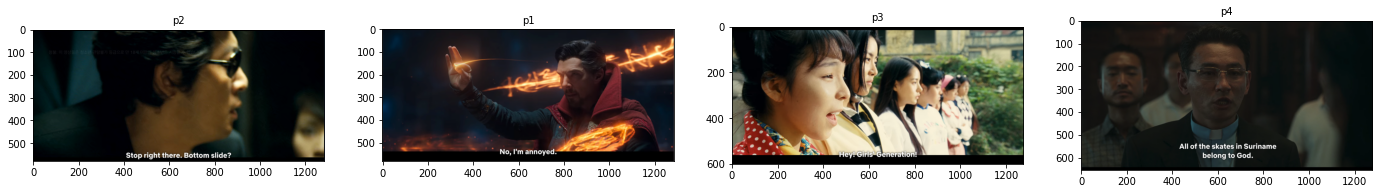

In [4]:
plt.figure(figsize=(24, 20))
for i, (image, title) in enumerate(zip(images, image_titles)):
    plt.subplot(3, 4, i+1)
    plt.imshow(image)
    plt.title(title, fontsize=10)

In [5]:
import matplotlib.pyplot as plt
import keras_ocr
pipeline = keras_ocr.pipeline.Pipeline()

Looking for /aiffel/.keras-ocr/craft_mlt_25k.h5
Looking for /aiffel/.keras-ocr/crnn_kurapan.h5


In [9]:
prediction_groups = [pipeline.recognize([filename]) for filename in test_filenames]

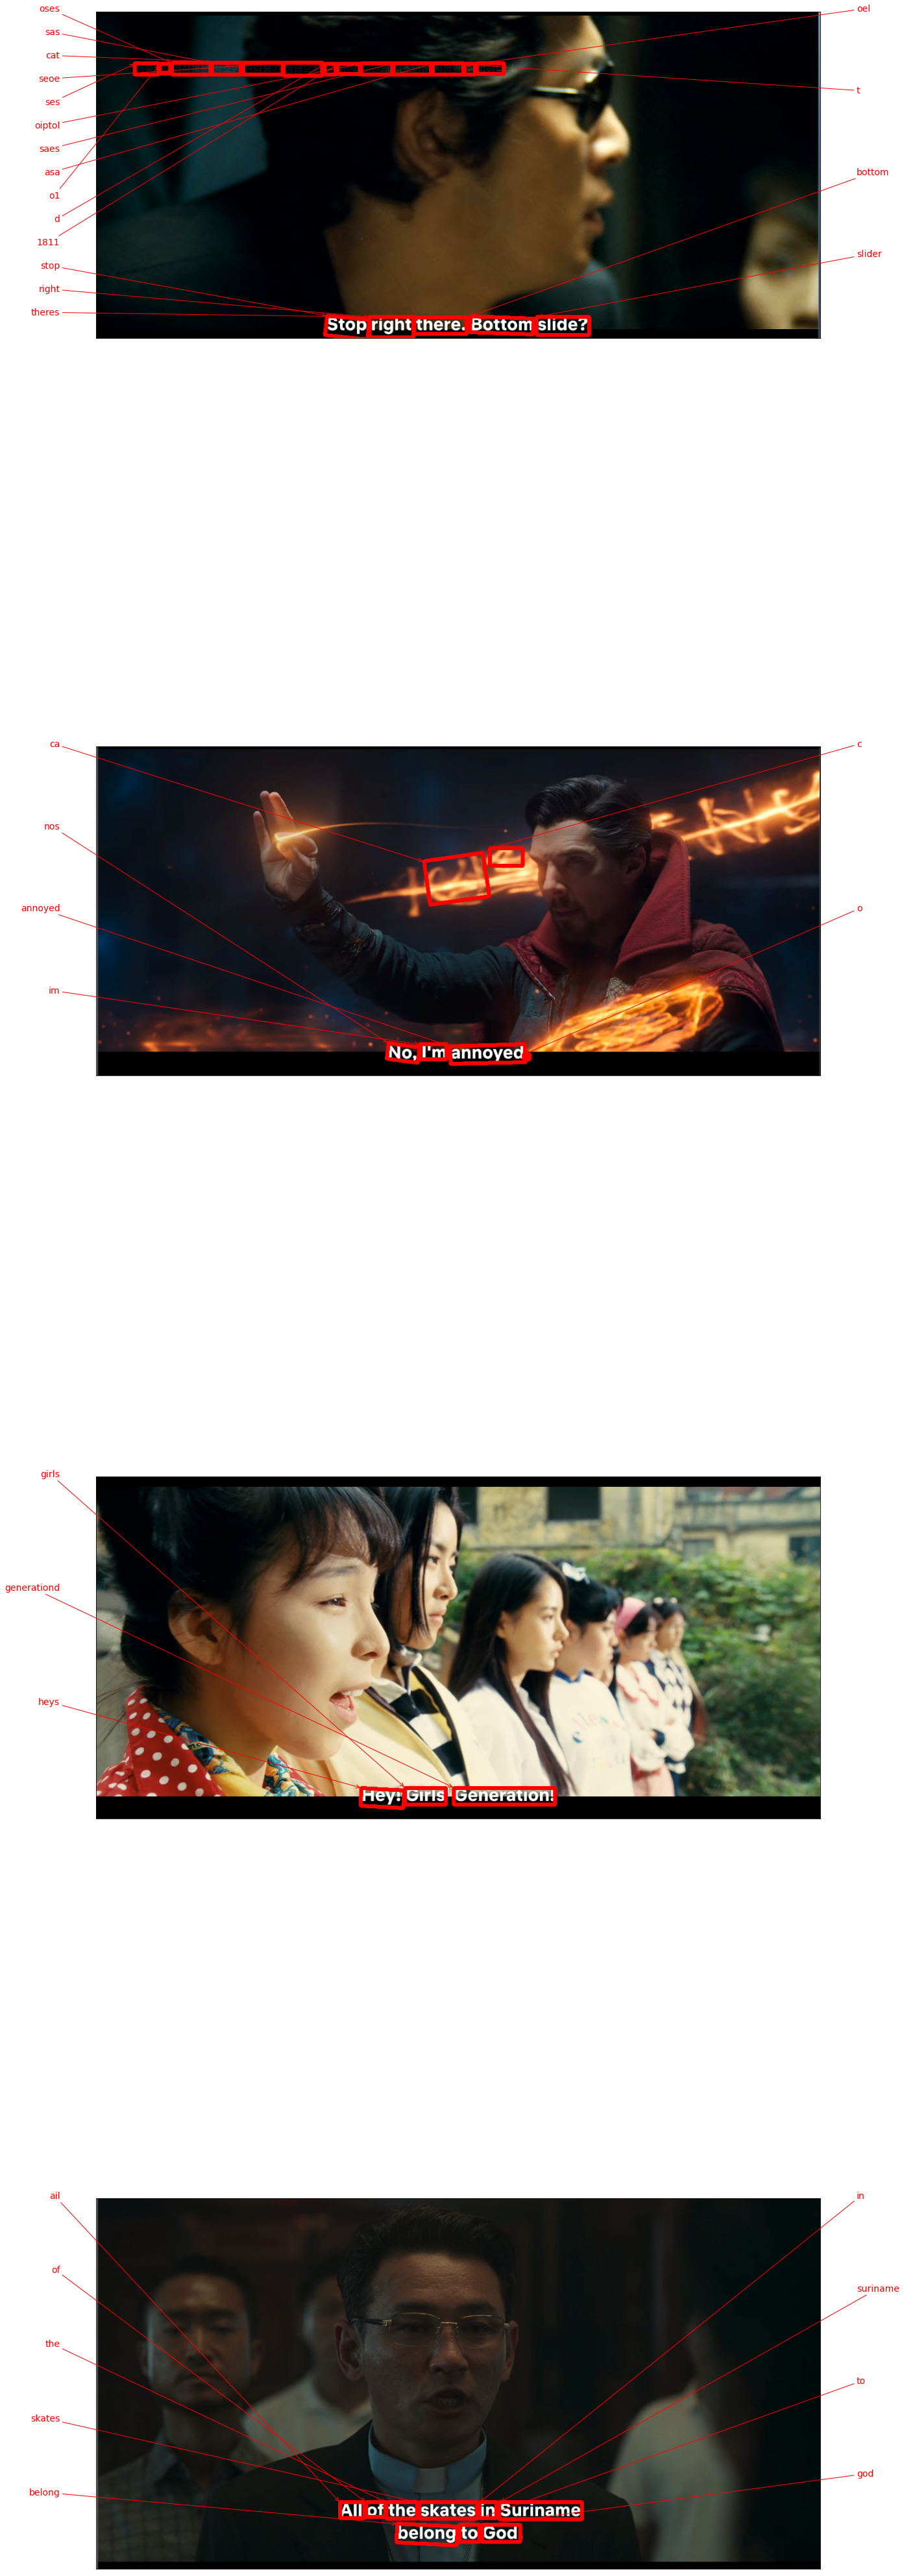

In [7]:
fig, axs = plt.subplots(nrows=len(images), figsize=(20, 80))
for idx, ax in enumerate(axs):
    keras_ocr.tools.drawAnnotations(image=images[idx], 
                                    predictions=prediction_groups[idx][0], ax=ax)

In [28]:
import os
import pytesseract
from PIL import Image
from pytesseract import Output
import matplotlib.pyplot as plt


def crop_word_regions(image_path='./images/sample.png', output_path='./output'):
    if not os.path.exists(output_path):
        os.mkdir(output_path)
    custom_oem_psm_config = r'--oem 3 --psm 3'
    image = Image.open(image_path)

    recognized_data = pytesseract.image_to_data(
        image, lang='eng',   
        config=custom_oem_psm_config,
        output_type=Output.DICT
    )
    
    top_level = max(recognized_data['level'])
    index = 0
    cropped_image_path_list = []
    for i in range(len(recognized_data['level'])):
        level = recognized_data['level'][i]
    
        if level == top_level:
            left = recognized_data['left'][i]
            top = recognized_data['top'][i]
            width = recognized_data['width'][i]
            height = recognized_data['height'][i]
            
            output_img_path = os.path.join(output_path, f"{str(index).zfill(4)}.png")
            print(output_img_path)
            cropped_image = image.crop((
                left,
                top,
                left+width,
                top+height
            ))
            cropped_image.save(output_img_path)
            cropped_image_path_list.append(output_img_path)
            index += 1
    return cropped_image_path_list


work_dir = os.getenv('HOME')+'/aiffel/ocr_python/sample'
img_file_path = work_dir + '/p2.png'   

cropped_image_path_list = crop_word_regions(img_file_path, work_dir)

/aiffel/aiffel/ocr_python/sample/0000.png
/aiffel/aiffel/ocr_python/sample/0001.png


In [29]:
def recognize_images(cropped_image_path_list):
    custom_oem_psm_config = r'--oem 3 --psm 7'
    
    for image_path in cropped_image_path_list:
        image = Image.open(image_path)
        recognized_data = pytesseract.image_to_string(
            image, lang='eng',    # 한국어라면 lang='kor'
            config=custom_oem_psm_config,
            output_type=Output.DICT
        )
        print(recognized_data['text'])
    print("Done")

# 위에서 준비한 문자 영역 파일들을 인식하여 얻어진 텍스트를 출력합니다.
recognize_images(cropped_image_path_list)


Stop right there. f x .

Done


테서랙트는 빠르긴한데 인식을 잘 못하고 keras-ocr은 정확한데 느려서 못쓸듯